In [1]:
import sys
sys.path.append('./scripts')

In [2]:
sys.version

'2.7.11 |Anaconda custom (x86_64)| (default, Dec  6 2015, 18:57:58) \n[GCC 4.2.1 (Apple Inc. build 5577)]'

In [3]:
import numpy as np

In [4]:
import sklearn
from IPython.display import Image 
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
clf = tree.DecisionTreeRegressor()
import tree_to_dict
from sklearn.externals import joblib

%matplotlib inline


/Users/wabbit/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
np.loadtxt('../data/Ht.txt',skiprows=0, dtype=np.float64)

array([[ -2.81467040e-07,  -2.34740700e-07,  -2.09770750e-07, ...,
         -1.03084960e-07,  -8.31573740e-08,  -7.13508260e-08],
       [ -3.16907890e-07,  -2.75000420e-07,  -2.47578670e-07, ...,
         -1.17969640e-07,  -1.00952460e-07,  -9.04247490e-08],
       [ -3.38413540e-07,  -3.15388320e-07,  -3.05160400e-07, ...,
         -1.54530500e-07,  -1.36889770e-07,  -1.25013000e-07],
       ..., 
       [ -5.69642000e-07,  -5.58196580e-07,  -5.38326900e-07, ...,
         -2.09608030e-07,  -2.10239930e-07,  -1.95144070e-07],
       [ -5.87961440e-07,  -5.74981360e-07,  -5.34893270e-07, ...,
         -1.52148900e-07,  -1.56362660e-07,  -1.43316290e-07],
       [ -6.00122410e-07,  -5.87407560e-07,  -5.40756450e-07, ...,
         -1.16781640e-07,  -1.01914790e-07,  -8.63592080e-08]])

In [6]:
Ht = np.loadtxt('../data/Ht.txt',skiprows=0, dtype=np.float64)
Po = np.loadtxt('../data/Po.txt',skiprows=0, dtype=np.float64)
Ph = np.loadtxt('../data/Ph.txt',skiprows=0, dtype=np.float64)
Am = np.loadtxt('../data/Am.txt',skiprows=0, dtype=np.float64)
Pl = np.loadtxt('../data/Pl.txt',skiprows=0, dtype=np.float64)
Ht2 = np.loadtxt('../data/Height.txt',skiprows=0, dtype=np.float64)
Po2 = np.loadtxt('../data/Potential.txt',skiprows=0, dtype=np.float64)
Ph2 = np.loadtxt('../data/Phase.txt',skiprows=0, dtype=np.float64)
Am2 = np.loadtxt('../data/Amplitude.txt',skiprows=0, dtype=np.float64)
Pl2 = np.loadtxt('../data/Photoluminescence.txt',skiprows=0, dtype=np.float64)

In [7]:
# flatten the images
Ht_flat = Ht.flatten()
Po_flat = Po.flatten()
Ph_flat = Ph.flatten()
Am_flat = Am.flatten()
Pl_flat = Pl.flatten()
Ht2_flat = Ht2.flatten()
Po2_flat = Po2.flatten()
Ph2_flat = Ph2.flatten()
Am2_flat = Am2.flatten()
Pl2_flat = Pl2.flatten()

In [8]:
X = [Ht_flat, Po_flat, Ph_flat, Am_flat]
X = np.array(X).T
Y = np.array(Pl_flat).T
print(X.shape)
print(Y.shape)
Y

(65536, 4)
(65536,)


array([ 3201.,  3166.,  3208., ...,  3810.,  4895.,  7214.])

In [9]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, random_state=0)
clf = DecisionTreeRegressor(max_depth=11)
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

In [10]:
metrics.mean_squared_error(ytest, ypred)

133442220.40554033

In [11]:
print(clf)

DecisionTreeRegressor(criterion='mse', max_depth=11, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


In [12]:
# We can export to a graphviz file, if we want to: 
with open("./results/afm_tree.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)
    
# Note that the sklearn tutorial uses pydot to turn .dot into .pdf; 
# It isn't supported in Python 3.  
# Instead figure out how to do it with https://pypi.python.org/pypi/graphviz, 
# or just take the .dot straight into d3 as Matt showed. 

## Demo of tree depth v.s. trees in the forrest

0.120310338768
0.120106893187
0.119730121499
0.119512731216
0.120263738018
0.117979073145
0.117685425491
0.11785827919
0.115167890906
0.113786787614
0.112514562687
0.11280399304
0.11171805483
0.112085782109
0.112051461459
0.113236174399
0.11224977862
0.110541188127
0.111577263155
0.110507153781
0.115943464424
0.114855062289
0.112490095814
0.113064407015
0.113380366358


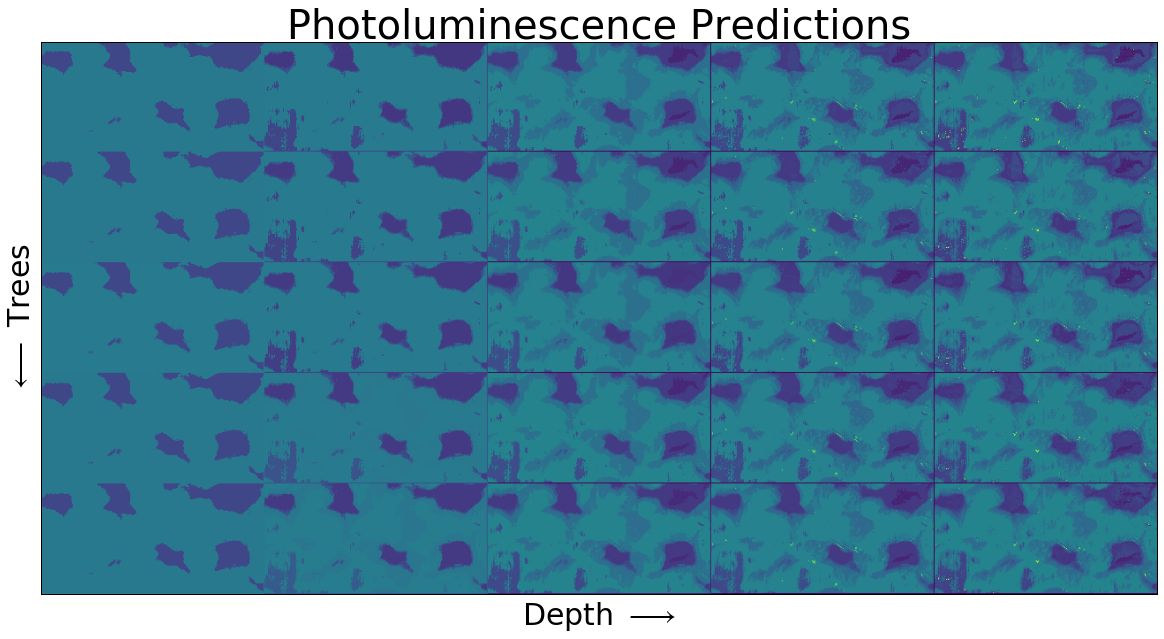

In [18]:
Xtrain = np.array([Ht2_flat[0:31625], Po2_flat[0:31625], Ph2_flat[0:31625], Am2_flat[0:31625]]).T
Xtest = np.array([Ht2_flat[31625:], Po2_flat[31625:], Ph2_flat[31625:], Am2_flat[31625:]]).T
Ytrain = np.array(Pl2_flat[0:31625])
Ytest = np.array(Pl2_flat[31625:])

depths = 5
trees = 5
x = Ht2.shape[0]/2*trees
y = Ht2.shape[1]
k=0
prediction = []

for q in range(1,depths+1):
    for r in range(1,trees+1):
        clf = RandomForestRegressor(max_depth=q, n_estimators=r, bootstrap=True)
        clf.fit(Xtrain, Ytrain)
        hold = clf.predict(Xtest)
        print(metrics.mean_squared_error(Ytest, hold))
        prediction.append(hold)
        k = k + 1
        for s in range(r):
            tree_to_dict.rules(clf.estimators_[s], ['Ht2_flat', \
            'Po2_flat', 'Ph2_flat', 'Am2_flat'], 'photoluminescence')
            # Use Janet's wrapper to save the tree as json:
            tree_to_dict.save_tree_as_dict(clf.estimators_[s], feature_names=['Ht2_flat', \
            'Po2_flat', 'Ph2_flat', 'Am2_flat'],
            label_names='photoluminescence', 
            save_path='./results/%s_depth_%s_trees_%s_estimator.json'\
            % (r,q,s), node_index=0)

k=0
merge = (np.array(prediction).flatten())
Pl_predict = np.zeros((x,y*depths))
for l in range(depths):
    for i in range(x):
        for j in range (y):
            Pl_predict[i,j+(l*y)] = merge[k]
            k = k + 1

fig = plt.figure(figsize=(20,10))
pl_ax = fig.add_subplot(1,1,1)
pl_ax.imshow(Pl_predict, cmap='viridis')
pl_ax.set_title('Photoluminescence Predictions', size=40)
pl_ax.set_ylabel('$\longleftarrow$ Trees', size=30)
pl_ax.set_xlabel('Depth $\longrightarrow$', size=30)
pl_ax.axes.get_xaxis().set_ticks([])
pl_ax.axes.get_yaxis().set_ticks([])

fig.savefig(filename='afm_depth', bbox_inches='tight')

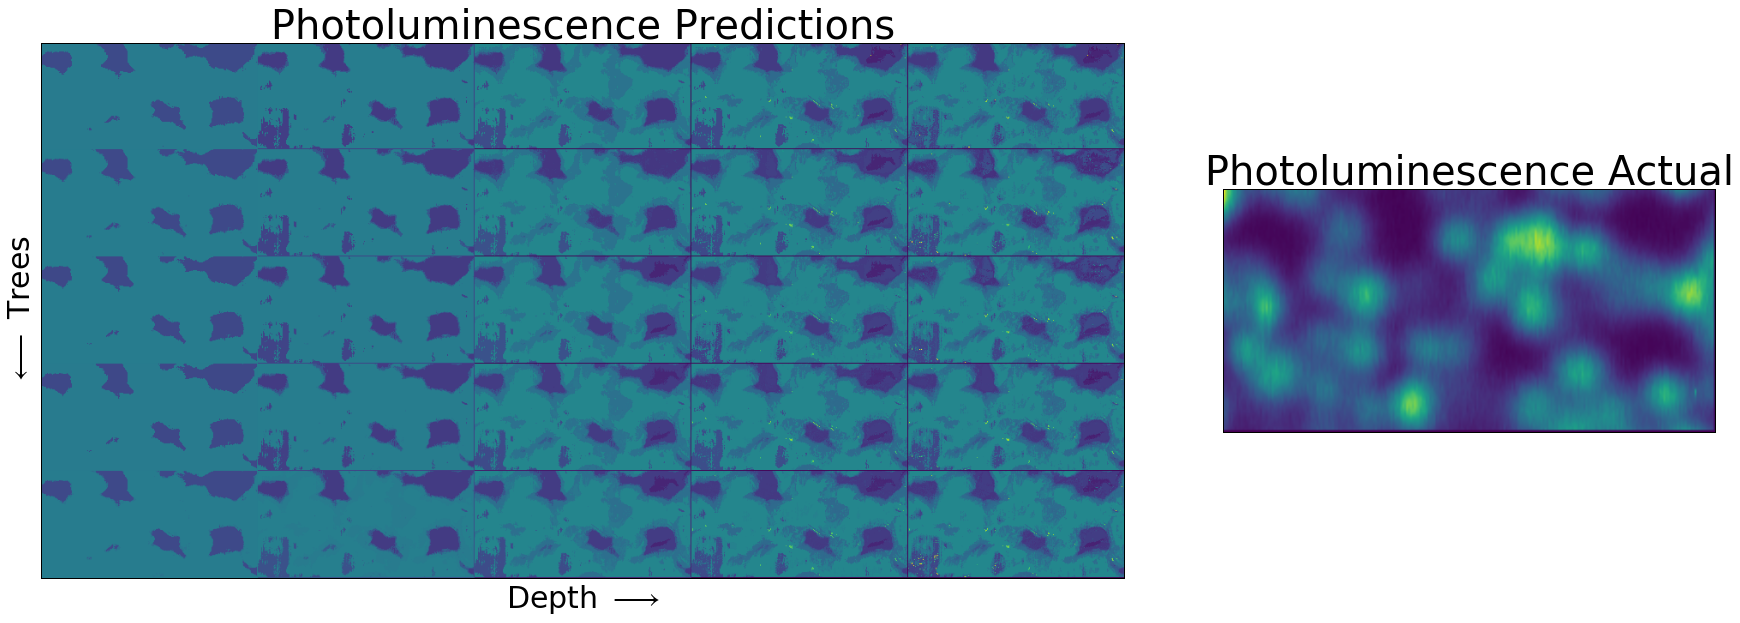

In [14]:
depths = 5
trees = 5
x = Ht2.shape[0]/2*trees
y = Ht2.shape[1]
k=0
merge = (np.array(prediction).flatten())
Pl_predict = np.zeros((x,y*depths))
for l in range(depths):
    for i in range(x):
        for j in range (y):
            Pl_predict[i,j+(l*y)] = merge[k]
            k = k + 1

fig = plt.figure(figsize=(30,10))
pl_ax = fig.add_subplot(1,3,(1,2))
pl_ax.imshow(Pl_predict, cmap='viridis')
pl_ax.set_title('Photoluminescence Predictions', size=40)
pl_ax.set_ylabel('$\longleftarrow$ Trees', size=30)
pl_ax.set_xlabel('Depth $\longrightarrow$', size=30)
pl_ax.axes.get_xaxis().set_ticks([])
pl_ax.axes.get_yaxis().set_ticks([])
pl_ax2 = fig.add_subplot(1,3,3)
pl_ax2.set_title('Photoluminescence Actual', size=40)
pl_ax2.imshow(Pl2[Pl2.shape[0]/2:,:], cmap='viridis')
pl_ax2.axes.get_xaxis().set_ticks([])
pl_ax2.axes.get_yaxis().set_ticks([])
fig.savefig(filename='afm_depth', bbox_inches='tight')

## Demo of sklearn tree --> dict --> json

In [13]:
import tree_to_dict

In [16]:
tree_to_dict.rules(clf.estimators_[0], ['Ht2_flat', 'Po2_flat', 'Ph2_flat', 'Am2_flat'], 'photoluminescence')

{'children': [{'children': [{'children': [{'children': [{'children': [{'name': '0 of p'},
          {'name': '0 of p'}],
         'name': 'Po2_flat > 0.281594991684'},
        {'children': [{'name': '0 of p'}, {'name': '0 of p'}],
         'name': 'Ph2_flat > 78.8296356201'}],
       'name': 'Ph2_flat > 84.5857467651'},
      {'children': [{'children': [{'name': '0 of p'}, {'name': '0 of p'}],
         'name': 'Ph2_flat > 80.9799346924'},
        {'children': [{'name': '0 of p'}, {'name': '0 of p'}],
         'name': 'Ph2_flat > 76.3161468506'}],
       'name': 'Ph2_flat > 76.9550170898'}],
     'name': 'Po2_flat > 0.2656686306'},
    {'children': [{'children': [{'children': [{'name': '1 of p'},
          {'name': '0 of p'}],
         'name': 'Po2_flat > 0.257803201675'},
        {'children': [{'name': '0 of p'}, {'name': '0 of p'}],
         'name': 'Ph2_flat > 88.5658035278'}],
       'name': 'Po2_flat > 0.251996517181'},
      {'children': [{'children': [{'name': '0 of p'}, {'name':

In [15]:
# Use Janet's wrapper to save the tree as json:
tree_to_dict.save_tree_as_dict(clf, feature_names=['Ht2_flat', 'Po2_flat', 'Ph2_flat', 'Am2_flat'],
                               label_names='photoluminescence', 
                               save_path='./results/sample_json_from_sklearn.json', node_index=0)

In [15]:
Xtrain = np.array([Ht2_flat[0:31625], Po2_flat[0:31625], Ph2_flat[0:31625], Am2_flat[0:31625]]).T
Xtest = np.array([Ht2_flat[31625:], Po2_flat[31625:], Ph2_flat[31625:], Am2_flat[31625:]]).T
Ytrain = np.array(Pl2_flat[0:31625])
Ytest = np.array(Pl2_flat[31625:])

prediction = []
clf = RandomForestRegressor(max_depth=5, n_estimators=3, bootstrap=True)
clf.fit(Xtrain, Ytrain)
hold = clf.predict(Xtest)
print(metrics.mean_squared_error(Ytest, hold))
prediction.append(hold)

clf.estimators_[0]

0.114093453317


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features='auto',
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False,
           random_state=1006228741, splitter='best')